In [1]:
%load_ext autoreload
%autoreload 2

import os
import yaml
import numpy as np
import matplotlib.pyplot as plt

# load experiment parameters
with open(os.path.join('..', 'params.yaml'), 'r') as fd:
    params = yaml.safe_load(fd)

In [2]:
# load raw data
with np.load(os.path.join('..', 'out', 'data_raw.npz')) as data:
    UV = data['UV']
    thT = data['thT']

print(UV.shape)
print(thT)

(1000, 16, 2, 32, 32)
[[0.0015 0.005 ]
 [0.0015 0.005 ]
 [0.0015 0.005 ]
 ...
 [0.0015 0.005 ]
 [0.0015 0.005 ]
 [0.0015 0.005 ]]


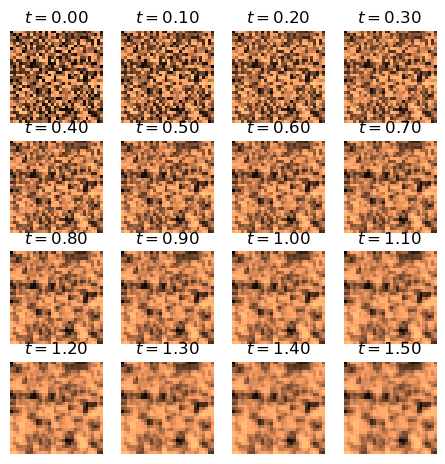

In [3]:
t_eval = np.linspace(params['data']['t_span'][0], params['data']['t_span'][1], params['data']['len_sequence'])

def show_patterns(field, ax=None):
    ax.imshow(field, cmap=plt.cm.copper, interpolation='none', extent=[-1, 1, -1, 1])
    ax.set_axis_off()

sample_idx = 0
fig, axes = plt.subplots(4, 4, figsize=(5.5, 5.5))
for i in range(16):
    ax = axes.flat[i]
    time_index = i*int(UV.shape[1]/15)
    show_patterns(UV[sample_idx,time_index,0,:,:], ax=ax)
    ax.set_title(f'$t={t_eval[time_index]:.2f}$')